In [1]:
import tables_io
import numpy as np
import matplotlib.pyplot as plt
from rail.raruma import plotting_functions as raruma_plot
from rail.raruma import utility_functions as raruma_util


In [2]:
d = tables_io.read("/Users/echarles/pz/sandbox_data/roman_rubin_9925.hdf5")
d.keys()

odict_keys(['LSST_obs_g', 'LSST_obs_g_err', 'LSST_obs_i', 'LSST_obs_i_err', 'LSST_obs_r', 'LSST_obs_r_err', 'LSST_obs_u', 'LSST_obs_u_err', 'LSST_obs_y', 'LSST_obs_y_err', 'LSST_obs_z', 'LSST_obs_z_err', 'ROMAN_obs_F184', 'ROMAN_obs_H158', 'ROMAN_obs_J129', 'ROMAN_obs_K213', 'ROMAN_obs_R062', 'ROMAN_obs_W146', 'ROMAN_obs_Y106', 'ROMAN_obs_Z087', '_orientationAngle', 'bulge_frac', 'dec', 'diskHalfLightRadiusArcsec', 'galaxy_id', 'mag_g_lsst', 'mag_i_lsst', 'mag_r_lsst', 'mag_u_lsst', 'mag_y_lsst', 'mag_z_lsst', 'major', 'minor', 'orientationAngle', 'ra', 'redshift', 'spheroidHalfLightRadiusArcsec', 'totalEllipticity', 'totalEllipticity1', 'totalEllipticity2', 'totalHalfLightRadiusArcsec'])

In [3]:
train = tables_io.sliceObj(d, slice(0, -1, 10))
test = tables_io.sliceObj(d, slice(1, -1, 10))

In [4]:
train_targets, train_features = raruma_util.prepare_data_total_mag_and_colors(train, 'LSST_obs_{band}', 'ugrizy')
test_targets, test_features = raruma_util.prepare_data_total_mag_and_colors(test, 'LSST_obs_{band}', 'ugrizy')

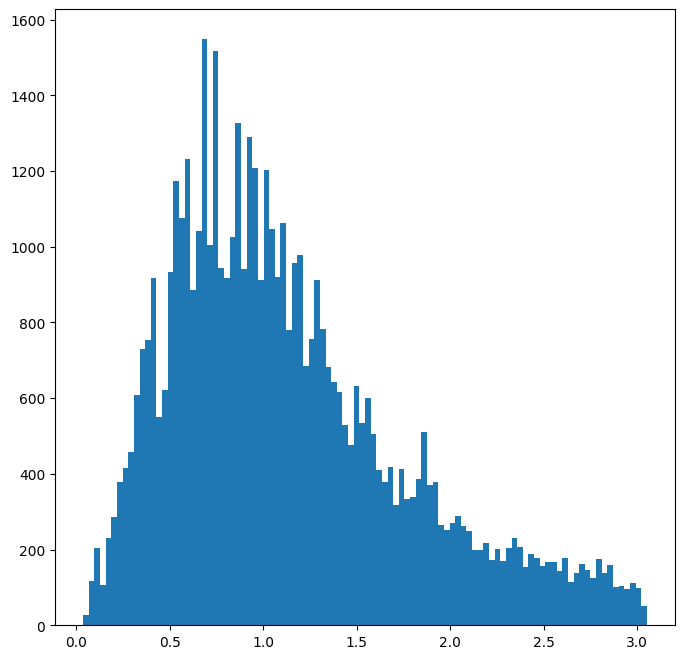

In [5]:
_ = raruma_plot.plot_true_nz(train_targets)

In [6]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [7]:
scaler = preprocessing.StandardScaler().fit(train_features)
pca = PCA(n_components=train_features.shape[-1], whiten=False)

In [8]:
scaled_train = scaler.transform(train_features).clip(-5, 5)
pca_train = pca.fit(scaled_train)

In [9]:
scaled_test = scaler.transform(test_features).clip(-5, 5)
pca_test = pca.fit(scaled_test)

In [10]:
from sklearn.ensemble import (HistGradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import HuberRegressor, LinearRegression, QuantileRegressor
from sklearn.svm import NuSVR
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

In [11]:
hbr = HistGradientBoostingRegressor()
etr = ExtraTreesRegressor()
abr = AdaBoostRegressor()
gpr = GaussianProcessRegressor()
isr = IsotonicRegression()
hur = HuberRegressor()
lir = LinearRegression()
qur = QuantileRegressor()
nsr = NuSVR()
knr = KNeighborsRegressor()
rnr = RadiusNeighborsRegressor()

In [12]:
def run_it(reg):
    preds = raruma_util.run_regression(reg, scaled_train, train_targets, scaled_test)
    _ = raruma_plot.plot_true_predict_fancy(test_targets, np.nan_to_num(preds, -0.4))
    _ = raruma_plot.plot_biweight_stats_v_redshift(test_targets, preds)

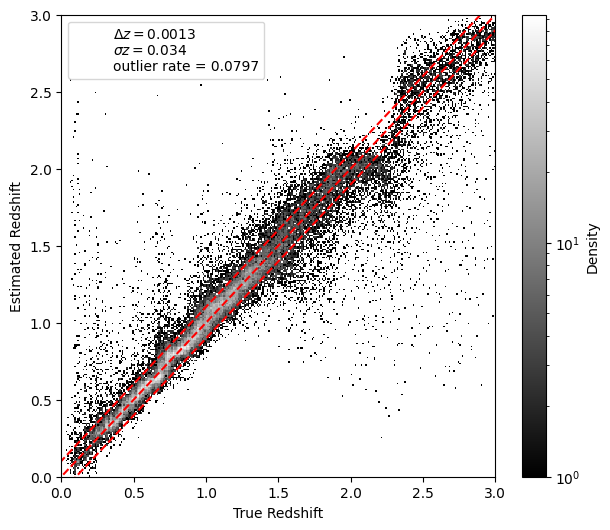

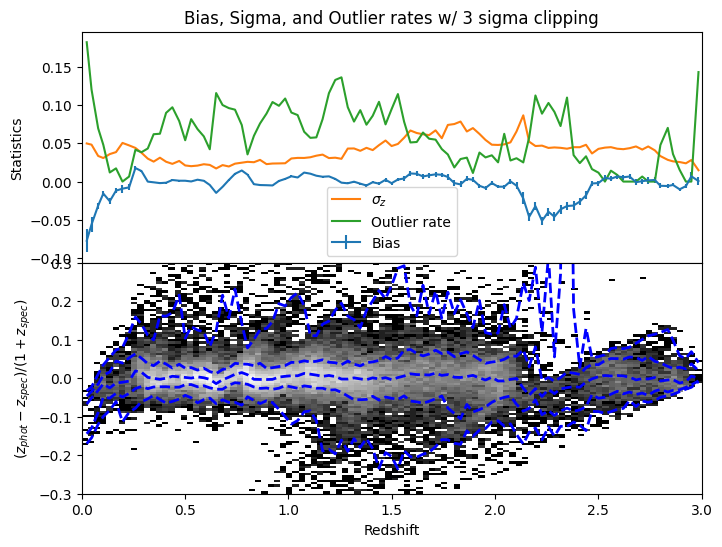

In [13]:
run_it(hbr)

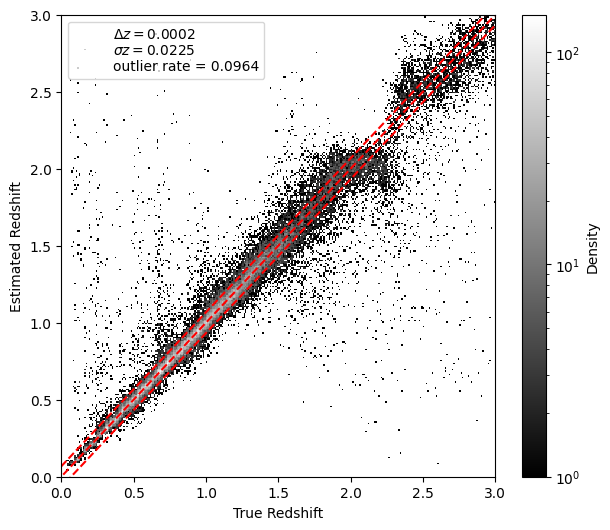

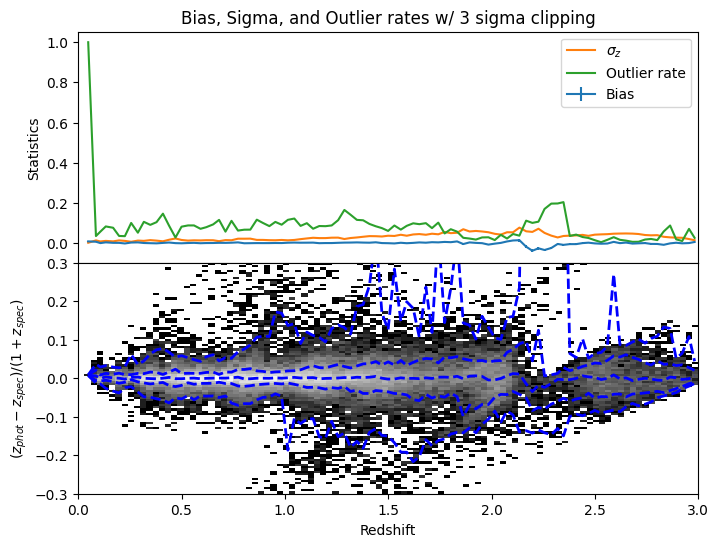

In [14]:
run_it(knr)